<a href="https://colab.research.google.com/github/Cksdud123/colab/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import cv2
import numpy as np
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [50]:
train_dir = glob.glob('/content/drive/MyDrive/Colab Notebooks/mvtec_anomaly_detection/bottle/train/good/*')
test_dir = glob.glob('/content/drive/MyDrive/Colab Notebooks/mvtec_anomaly_detection/bottle/test/broken_large/*')

In [51]:
train_images = []
train_labels = []
test_images = []
test_labels = []
target_size = (150, 150)

In [52]:
# 데이터셋 내의 모든 이미지 파일에 대해 resize 작업과 픽셀 값 정규화 작업
# 이미지 로드 및 리사이징
for img_path in train_dir:
    img = Image.open(img_path)
    rgb_img = img.convert('RGB')
    resized_img = rgb_img.resize(target_size)
    img_array = np.array(resized_img)
    min_value = img_array.min()
    max_value = img_array.max()
    normalized_img_array = (img_array - min_value) / (max_value - min_value)
    train_images.append(normalized_img_array)
    train_labels.append(0)

In [53]:
for img_path in test_dir:
    img = Image.open(img_path)
    rgb_img = img.convert('RGB')
    resized_img = rgb_img.resize(target_size)
    min_value = img_array.min()
    max_value = img_array.max()
    normalized_img_array = (img_array - min_value) / (max_value - min_value)
    test_images.append(normalized_img_array)
    test_labels.append(1)

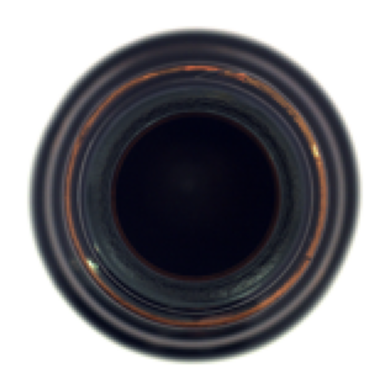

첫 번째 이미지의 크기: (150, 150, 3)


In [54]:
# 첫 번째 이미지 시각화 및 resizing이 제대로 되었는지 확인
plt.imshow(train_images[0])
plt.axis('off')
plt.show()

first_image_size = train_images[0].shape
print("첫 번째 이미지의 크기:", first_image_size)

In [55]:
# 정상과 비정상 데이터를 합친 전체 데이터셋
all_images = train_images + test_images
all_labels = train_labels + test_labels

# 데이터를 훈련 세트와 검증 세트로 분리
train_images, val_images, train_labels, val_labels = train_test_split(all_images,
                                                                      all_labels,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [56]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu',
                              padding='same', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [58]:
# numpy배열로 변환
train_images = np.array(train_images)
val_images = np.array(val_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [59]:
# 모델 훈련하기
epochs = 50
history = model.fit(train_images, train_labels, epochs=epochs, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 4s 623ms/step - loss: 1.3855 - accuracy: 0.7123 - val_loss: 1.4559 - val_accuracy: 0.8649
Epoch 2/50
5/5 [==============================] - 4s 934ms/step - loss: 0.5753 - accuracy: 0.8630 - val_loss: 0.5710 - val_accuracy: 0.8649
Epoch 3/50
5/5 [==============================] - 4s 626ms/step - loss: 0.4110 - accuracy: 0.8904 - val_loss: 0.3773 - val_accuracy: 0.8649
Epoch 4/50
5/5 [==============================] - 3s 559ms/step - loss: 0.3662 - accuracy: 0.9041 - val_loss: 0.4184 - val_accuracy: 0.8649
Epoch 5/50
5/5 [==============================] - 3s 595ms/step - loss: 0.3254 - accuracy: 0.9247 - val_loss: 0.3539 - val_accuracy: 0.8649
Epoch 6/50
5/5 [==============================] - 3s 687ms/step - loss: 0.2340 - accuracy: 0.9247 - val_loss: 0.2189 - val_accuracy: 0.8649
Epoch 7/50
5/5 [==============================] - 4s 857ms/step - loss: 0.1595 - accuracy: 0.9384 - val_loss: 0.1747 - val_accuracy: 0.8649
Epoch 8/50
5/5 [===============

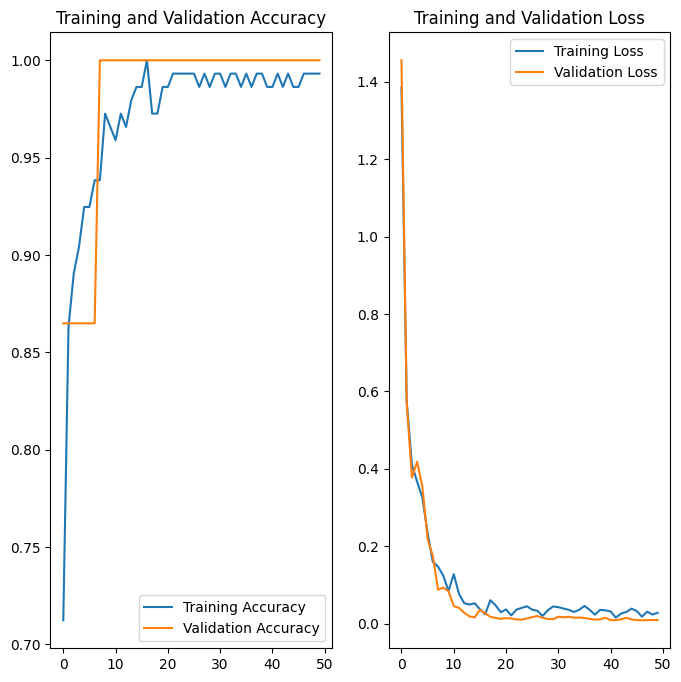

1/1 [==============================] - 0s 128ms/step - loss: 0.0657 - accuracy: 1.0000
Test Loss: 0.06567852944135666
Test Accuracy: 1.0


In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 테스트 데이터를 사용하여 모델 평가
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

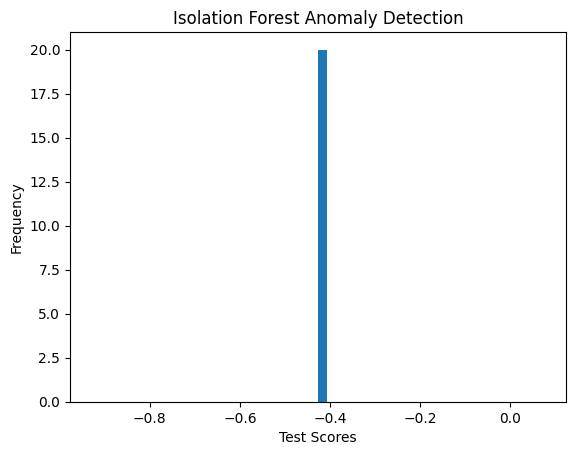

In [61]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# 정상 데이터로 Isolation Forest 모델 훈련
isolation_forest = IsolationForest(contamination=0.1)  # contamination은 이상치 비율을 나타내는 하이퍼파라미터
isolation_forest.fit(train_images_flat)

# 테스트 데이터를 사용하여 이상치 감지
test_scores = isolation_forest.score_samples(test_images_flat)

# 이상치 점수 시각화 (더 낮은 점수는 이상치를 의미)
plt.hist(test_scores, bins=50)
plt.xlabel('Test Scores')
plt.ylabel('Frequency')
plt.title('Isolation Forest Anomaly Detection')
plt.show()